In [1]:
import numpy as np
import matplotlib.pyplot as plt
import p02

/home/tyama/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
np.set_printoptions(precision=2, linewidth=200)

In [3]:
basis_nwn = np.mgrid[-4:5,-4:5].reshape(2, -1).T
box_size = np.full(2, 2*np.pi)
vext = np.full((16, 16), 20, dtype=float)
vext[0:7, 0:7] = 0
e, v = p02.solve_1elec(basis_nwn, box_size, vext)

np.fft.fftn 0:00:00.000449
symmetrize 0:00:00.000488
f_basis_nwn_cart 0:00:00.004673
f_vext_nwn 0:00:00.003352
f_vext_mat 0:00:00.001541
f_kin_mat 0:00:00.001381
eigh 0:00:00.028483


In [4]:
e

array([1.01, 2.6 , 2.6 , 4.18, 5.05, 5.05])

In [5]:
w = np.zeros((v.shape[1],) + vext.shape, dtype=np.complex128)

In [6]:
w[(slice(None), ) + tuple(basis_nwn.T)] = v.T

In [7]:
w.ndim

3

In [8]:
w_re = np.fft.ifftn(w, norm='forward', axes=range(1,w.ndim))

In [9]:
w2 = w_re.real**2 + w_re.imag**2

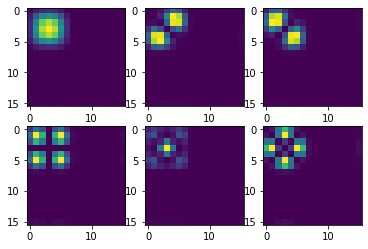

In [10]:
fig, ax = plt.subplots(2, 3)
for i in range(6):
    ax[i//3][i%3].imshow(w2[i])

In [11]:
w2[0].sum()

256.00000000000006

In [12]:
np.fft.ifftn([0, 0.5, 0, 0.5])

array([ 0.25+0.j,  0.  +0.j, -0.25+0.j,  0.  +0.j])

In [13]:
np.fft.ifftn([0, 0.5, 0, 0.5], norm='forward')

array([ 1.+0.j,  0.+0.j, -1.+0.j,  0.+0.j])

In [14]:
np.fft.fftn([1, 0, -1, 0])

array([0.+0.j, 2.+0.j, 0.+0.j, 2.+0.j])

In [15]:
np.fft.fftn([1, 0, -1, 0], norm='forward')

array([0. +0.j, 0.5+0.j, 0. +0.j, 0.5+0.j])